# The objective of this EDA is to find the relationship between "Housing Price " and different aspects affecting it.
Link to the dataset:https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

In [ ]:
#importing numpy pandas mathplotand other methods
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#first read the data file
df= pd.read_csv('housing_price_dataset.csv')

In [ ]:
df.head()

In [ ]:
# quick look to dataset
df.tail()

In [ ]:
# Size of the data 
df.shape

In [15]:
# A Quick Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


# Notations for data.info()

- 0 does not count as null value
- int64 and float64 means the the data has total space of 64 bytes
- in dtype feature, we have to convert the string data given by user to 0 and 1 so that the machine can understand
- total memory of 2.3+ MB


In [16]:
#Print summary statistics
df.describe()


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [17]:
# Checking for Null Values
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

### Now we use the mean manupulation method so that we can replace null values with mean value
### Mean manupulation method refers to the method in which we replace the null value with mean value

In [18]:
#Inspect missing values in the dataset
print(df.isnull().values.sum())

#Replace the ''s with Nan
df = df.replace(" ",np.NaN)

#Impute the missing values with mean imputation
df=df.fillna(df.mean())

#Count the numbers of NaNs in the dataset to verify
print(df.isnull().values.sum())

0
0


C:\Users\DELL\AppData\Local\Temp\ipykernel_6708\2741233905.py:8: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [19]:
#Print summary statistics
df.describe()


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


# House Pricing Data Insights
* Minimum House Pricing is 76141.842966
* Average House Pricing is 224827.325151
* Maximum House Pricing is 492195.259972

In [20]:
df.corr().head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6708\2670547417.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.003748,0.028418
YearBuilt,0.000482,0.003147,0.003748,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,-0.002288,1.000000


In [21]:
fig=px.histogram(df,x='Price')
fig.show()

# Insights
    -Here we can see the House Pricing in the range of 100K-300K is highly concentrated.
  

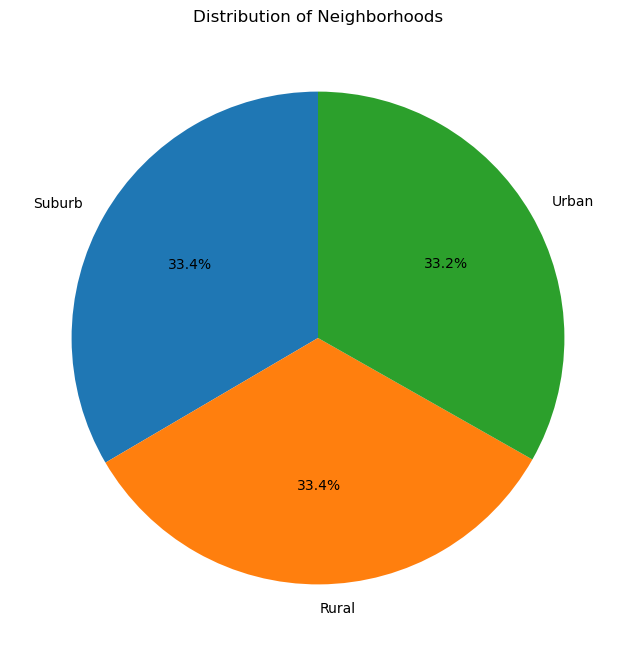

In [13]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df["Neighborhood"].value_counts(), labels=df["Neighborhood"].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Neighborhoods')
plt.show()

## Insights 
The above pie chart shows the distribution of houses.

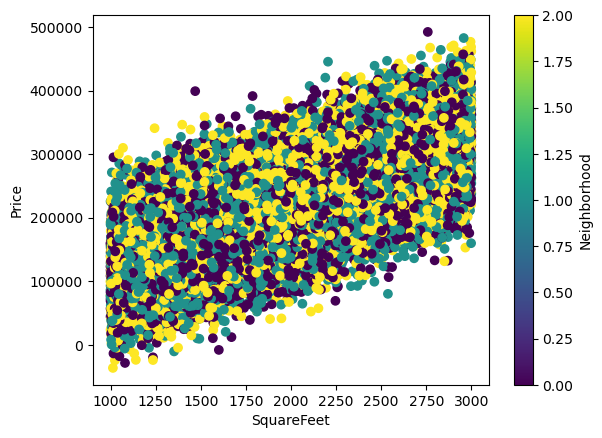

In [23]:
plt.figure()
df["Neighborhood"] = df["Neighborhood"].astype("category")
plt.scatter(x=df["SquareFeet"], y=df["Price"], c=df["Neighborhood"].cat.codes)
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.colorbar(label="Neighborhood")
plt.show()

# Insights
- As the square feet increases, price increases

C:\Users\DELL\AppData\Local\Temp\ipykernel_6708\2086905653.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

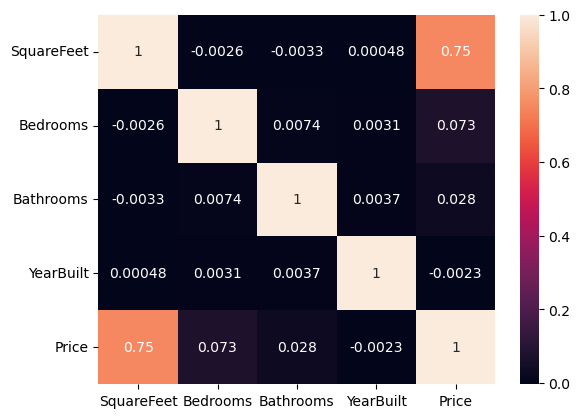

In [24]:
sns.heatmap(df.corr(method='pearson'), annot=True)

# Insights
- This Heatmap shows the relationship between different features
- The value near to 1 means the two features are closely related where +ve value means the two features are directly related whereas -ve value means the two features are inversely proportional.
- This graph shows that House Pricing is related to square feet and is not related too much to other features